# Airplane Crashes Investigation
![](Data/Apc/mayday.jpg)

In [6]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

apc = pd.read_csv('Data/Apc/apc.csv')

Check the number of records in the dataset and take a sample record to inspect.

In [7]:
len(apc)

5268

In [8]:
apc.sample(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2510,11/21/1971,NaN,"Near Penghu Island, Taiwan",China Airlines (Taiwan),NaN,Taipei - Hong Kong,Sud Aviation SE-210 Caravelle III,B-1852,122,25.0,25.0,0.0,The plane crashed into the sea while on a flig...


In [9]:
apc.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

## Data Cleaning

* Convert Dates to datetime 
* Add a new column for the year
* Add a new column for the Weekday
* Add a new column for the Hour
* Add a column with the ratio of fatalities per passengers aboard (fr)
* Remove military flights (we are not interested)

In [10]:
# Convert Date, add Year, Weekday and Hour columns
import calendar
apc['Date'] = pd.to_datetime(apc['Date'])
apc['Year'] = apc['Date'].map(lambda x:x.year)
apc['Weekday'] = apc['Date'].map(lambda x:x.weekday_name)
apc['Hour'] = pd.to_datetime(apc['Time'], format='%H:%M',errors='coerce').dt.hour

In [11]:
# Add column with ratio of fatalities per passengers aboard
apc['fr']=apc['Fatalities']/apc['Aboard']

In [12]:
# Remove Military Flights because we are not interested in them
# First remove null Operators
apc.dropna(subset=['Operator'],inplace=True)
apc = apc[-apc['Operator'].str.contains("Military")]

## Number of Crashes per Year

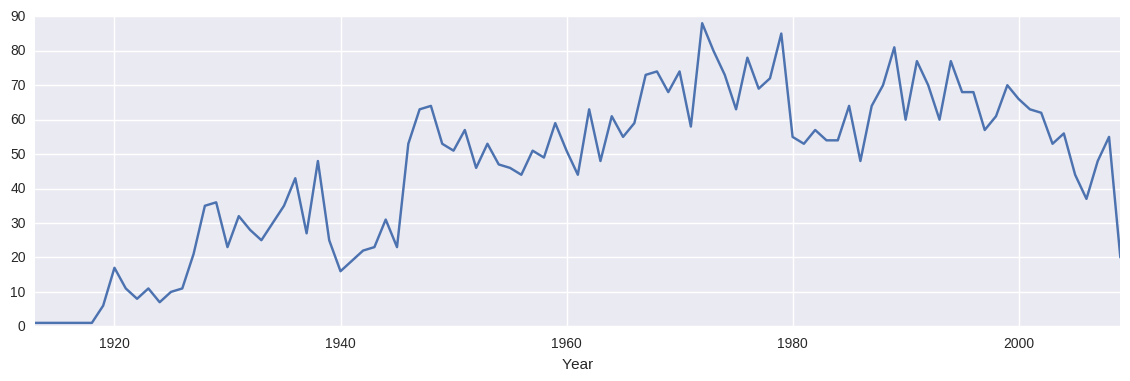

In [13]:
# Number of crashes per year
apc.groupby('Year').count()['Operator'].plot(figsize=(14,4));

## Number of Fatalities per Year

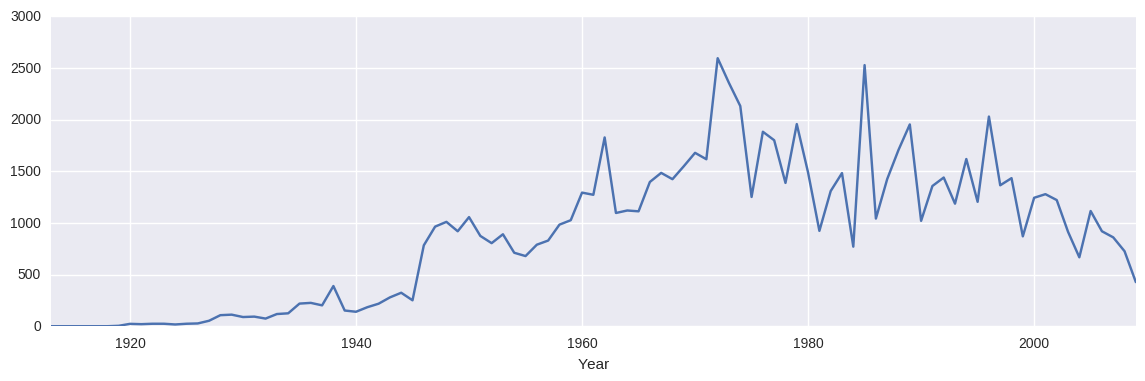

In [14]:
# List of Fatalities by Year
apc.groupby('Year').sum()['Fatalities'].plot(figsize=(14,4));

## Time of day when Crashes Occur
This might be just the most common time for flights, we don't have data for normal flights to compare.

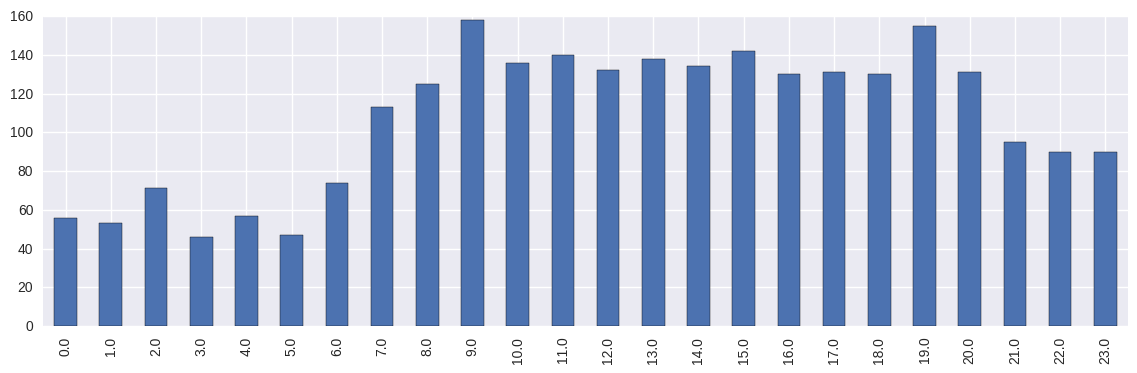

In [15]:
# Most common time for crashes (maybe this is just more common time for flights!)
apc['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(14,4));

## Number of Crashes by Operator

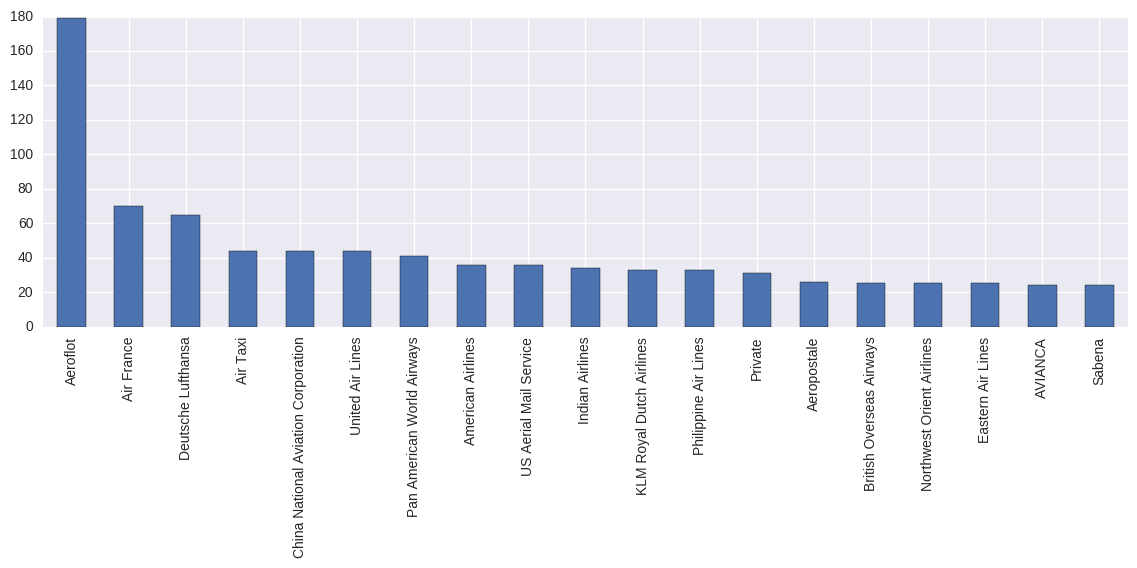

In [16]:
# Number of crashes by operator
apc['Operator'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));

## Number of Fatalities per Operator

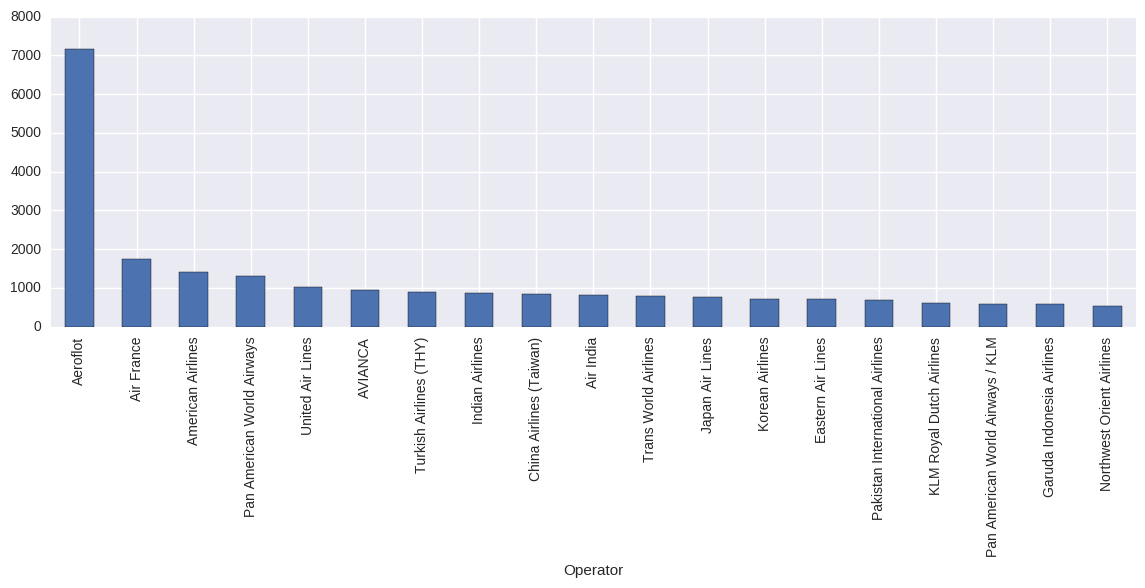

In [17]:
# Number of fatalities by operator
apc.groupby('Operator').sum()['Fatalities'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

## Fatality Rate by Operator

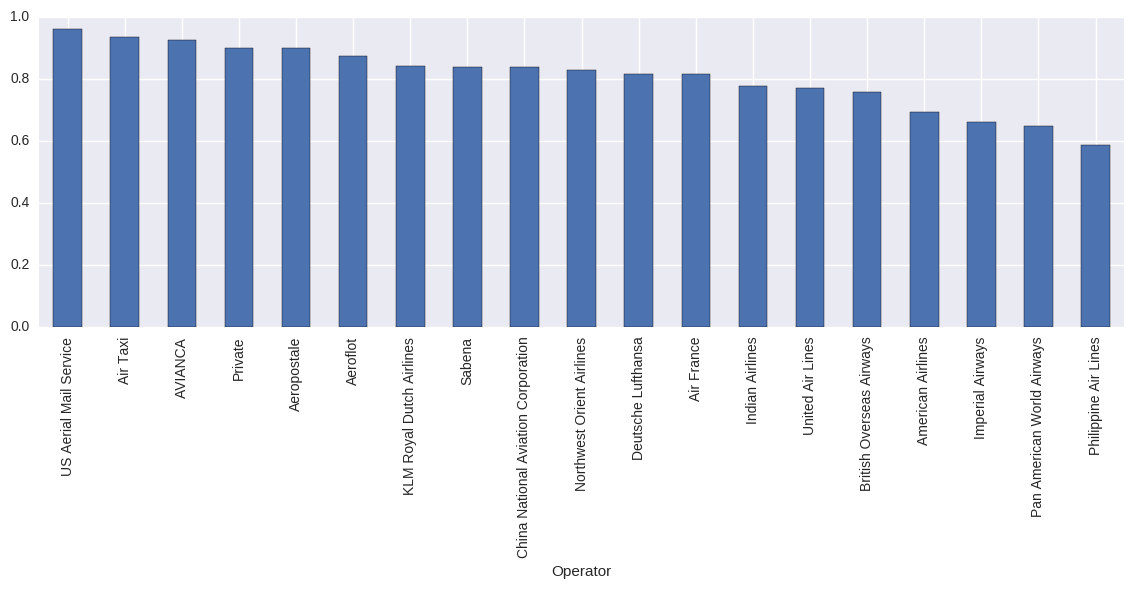

In [18]:
# Fatalities based on number of people aboard (for operators with 10 or more crashes)
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>20][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

## Fatality Rate per Year

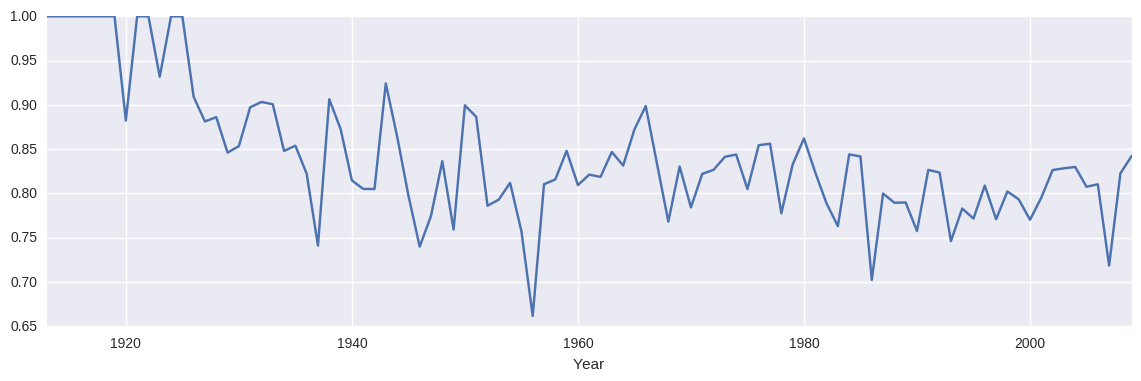

In [19]:
# Fatality Rate per Year
apc.groupby('Year').mean()['fr'].plot(figsize=(14,4));

## Highest Fatality Rate for Airlines with 10 or More Crashes

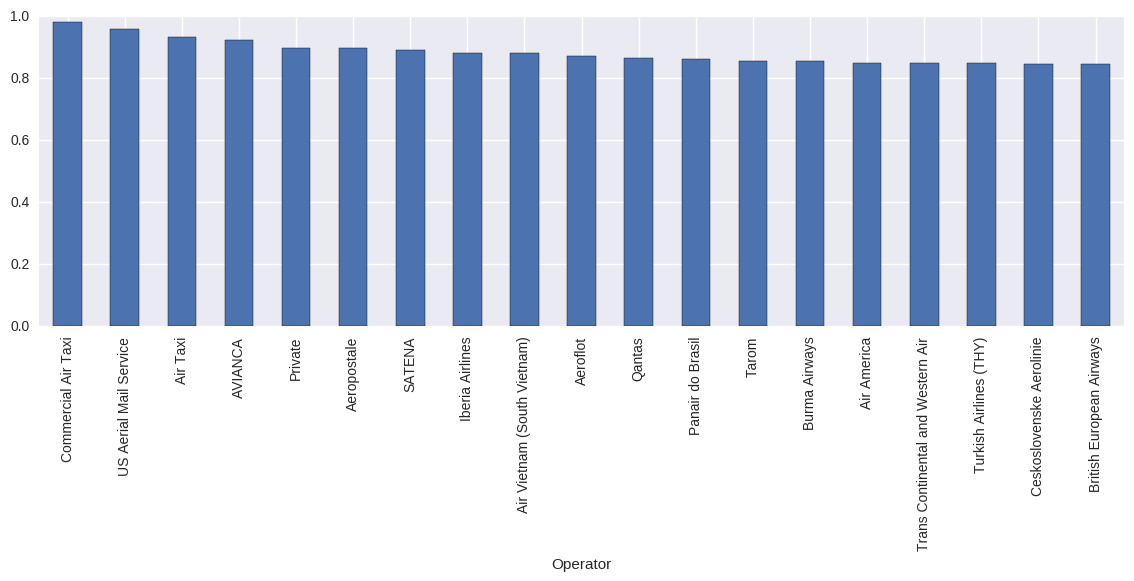

In [20]:
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

## Lowest Fatality Rate for Airlines with 10 or more crashes

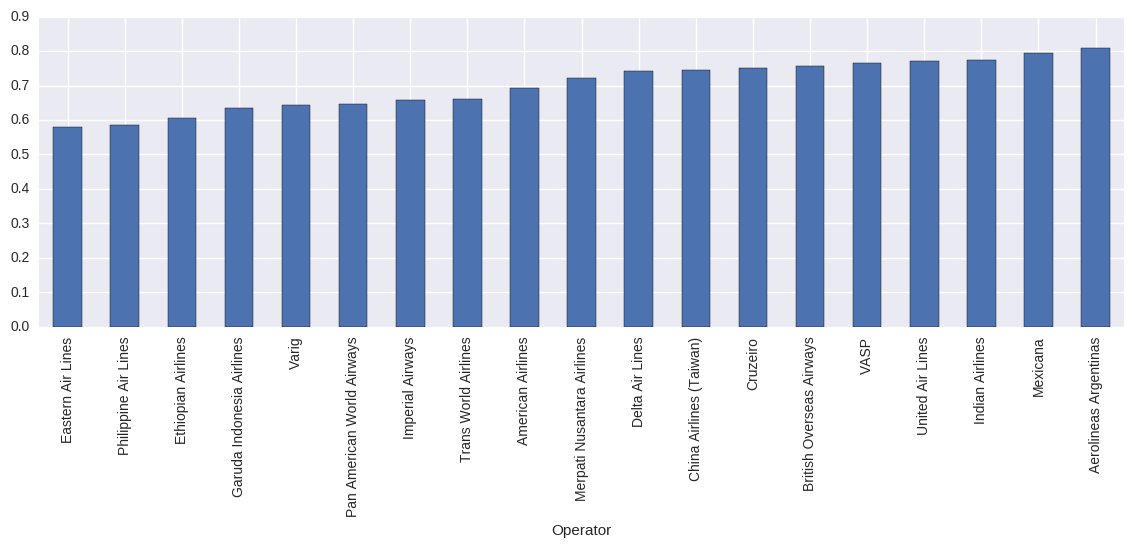

In [21]:
# Airlines with more than 10 crashes but lowest fatality rate
fr = apc.groupby('Operator').agg(['mean','count'])
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4));

## Fatality Rate by Airplane Type

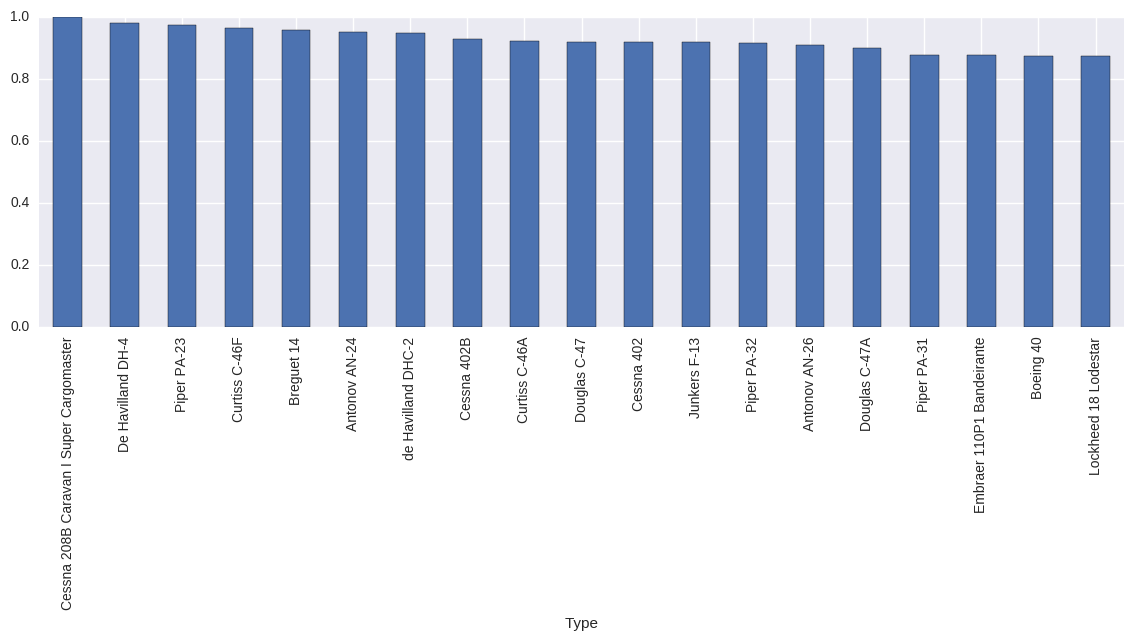

In [22]:
# Fatality rate by airplane type
fr = apc.groupby('Type').agg(['mean','count'])
fr.loc[fr[('fr','count')]>10][('fr','mean')].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

## Most Significant Disasters

In [23]:
# Most Significant Disasters
apc.sort_values('Fatalities',ascending=False)[0:19]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Weekday,Hour,fr
2963,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,1977,Sunday,17.0,0.905280
3568,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,520.0,0.0,The aircraft suffered an aft pressure bulkhead...,1985,Monday,18.0,0.992366
4455,1996-11-12,18:40,"Near Charkhidadri, India",Saudi Arabian Airlines / Kazastan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZAIH/UN-76435,22748/555/1023413428,349.0,349.0,0.0,Midair collision 17 km W of New Delhi. The Sa...,1996,Tuesday,18.0,1.000000
2726,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,346.0,0.0,The aircraft crashed shortly after takeoff fro...,1974,Sunday,11.0,1.000000
3562,1985-06-23,07:15,"AtlantiOcean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,329.0,0.0,The aircraft broke up in flight and crashed in...,1985,Sunday,7.0,1.000000
3240,1980-08-19,19:08,"Near Riyadh, Saudi Arabia",Saudi Arabian Airlines,163,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,1169,301.0,301.0,0.0,The flight experienced a fire in the aft cargo...,1980,Tuesday,19.0,1.000000
3775,1988-07-03,10:55,"Over the Persian Gulf, near Bandar Abbas, Iran",Iran Air,655,Bandar Abbas - Dubai,Airbus A300B2-203,EP-IBU,186,290.0,290.0,0.0,The civilian Iranian airliner was shot down by...,1988,Sunday,10.0,1.000000
3137,1979-05-25,15:04,"Chicago O'Hare, Illinois",American Airlines,191,"Chicago, IL- Los Angeles, CA",McDonnell Douglas DC-10-10,N110AA,46510/22,271.0,271.0,2.0,"During takeoff just, as the plane lifted from ...",1979,Friday,15.0,1.000000
3436,1983-09-01,18:26,"Near Sakhalin Island, Russia",Korean Airlines,007,Anchorage - Seoul,Boeing B-747-230B,HL-7442,20559/186,269.0,269.0,0.0,"On a flight from Alaska to South Korea, the ai...",1983,Thursday,18.0,1.000000
4249,1994-04-26,20:16,"Near Komaki, Aichi, Japan",China Airlines (Taiwan),140,Taipe - Nagoya,Airbus A300B4-622R,B-1816,580,271.0,264.0,0.0,"While on ILS approach to Nagoya Airport, at an...",1994,Tuesday,20.0,0.974170


## Processing the Description of Crashes

* First a BOW (Bag of Words) model is built for the crash reports.
* Then K-Means is used to cluster the reports 
* We want to examine how accidents are clustered, what kind of accidents we have 

In [24]:
# Build a BOW model for 
apc.dropna(subset=['Summary'],inplace=True)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english')
x = v.fit_transform(apc['Summary'])

In [25]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [50,70,100,150]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

 

Automatically created module for IPython interactive environment
For n_clusters = 50 The average silhouette_score is : 0.0177456996967
For n_clusters = 70 The average silhouette_score is : 0.0181191073095
For n_clusters = 100 The average silhouette_score is : 0.0221321642244
For n_clusters = 150 The average silhouette_score is : 0.0236048948074


In [26]:
len(apc)

4131

In [27]:
NUM_CLUSTERS=120
from sklearn.cluster import KMeans
from sklearn import metrics

from time import time
t0 = time()
km = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', max_iter=300, n_init=1,
                verbose=True)
km.fit(x)
print("done in %0.3fs" % (time() - t0))

Initialization complete
Iteration  0, inertia 5553.939
Iteration  1, inertia 3421.807
Iteration  2, inertia 3386.146
Iteration  3, inertia 3362.107
Iteration  4, inertia 3346.983
Iteration  5, inertia 3338.295
Iteration  6, inertia 3333.067
Iteration  7, inertia 3329.090
Iteration  8, inertia 3326.218
Iteration  9, inertia 3324.680
Iteration 10, inertia 3323.621
Iteration 11, inertia 3323.032
Iteration 12, inertia 3322.657
Iteration 13, inertia 3322.491
Iteration 14, inertia 3322.317
Iteration 15, inertia 3322.219
Converged at iteration 15
done in 2.305s


In [28]:
len(km.labels_)

4131

In [29]:
apc['cluster'] = km.labels_

In [30]:
apc.groupby('cluster').agg('size').sort_values(ascending=False)[0:9]

cluster
55    402
19    124
42    102
80     98
48     93
95     90
6      89
40     89
23     71
dtype: int64

## Print the reports for a given cluster number

In [31]:
CLUSTER_NUMBER = 3
def print_full(x,col):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_colwidth', col)
    print(x)
    pd.reset_option('display.max_rows')
ap1 = apc.sort_values(by='cluster').loc[apc['cluster']==CLUSTER_NUMBER,['Summary']]
print_full(ap1,100)

                                                                                                  Summary
4078  The aircraft crashed into trees during its approach. The crew mistook the hotel lights for runwa...
934                                                                           Struck the Sierra Cristais.
1352  The plane crashed into approach lights of the runway during the fourth landing attempt at Idlewi...
1844  Descended prematurely struck the ground 2 km short of  the runway. Crew mistook lights perpendic...
2660  The cargo plane was making an instrument approach to Runway 14 with the speed brake lever at 45 ...
961                                                                   Struck the side of Galeras Volcano.
1394  Crash landed in a sandstorm on the fourth landing attempt.  The plane came in too low, struck a ...
3888  The aircraft took off, made a left turn and crashed into trees.  Improper planning and decision ...
1779  During takeoff from Orly Airport, the no

In [32]:
apc['desc']=''
from nltk.corpus import stopwords
stop = stopwords.words('english')

## Try to give each cluster a description
Take the most frequent words from each cluster removing stopwords and build a short description for the cluster.

In [33]:
# Try to give each cluster a name?
from tqdm import tqdm
for cluster_number in tqdm(range(0,NUM_CLUSTERS)):
    ap1 = apc.loc[apc['cluster']==cluster_number,['Summary']]
    ap1['Summary2']= ap1['Summary'].apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))
    description = ' '.join(pd.Series(' '.join(ap1['Summary2']).lower().split()).value_counts()[:100][0:9].index.tolist())
    apc.loc[apc['cluster']==cluster_number,['desc']]=description


100%|██████████| 120/120 [00:02<00:00, 42.67it/s]


In [34]:
apc

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Weekday,Hour,fr,cluster,desc
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,"The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, ...",1913,Wednesday,NaN,1.000000,55,aircraft crashed plane pilot crew flight engine failure miles
22,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go int...,1919,Sunday,NaN,1.000000,71,plane crashed airport tried return minutes pilot crew engine
40,1920-10-05,NaN,"Valencia, Spain",Latecoere Airlines,NaN,NaN,Breguet 14,F-ALTA,20,2.0,2.0,0.0,Crashed while landing.,1920,Tuesday,NaN,1.000000,18,emergency crashed landing landing. attempting make plane engine pilot
43,1920-12-14,NaN,"Cricklewood, England",Handley Page Transport,NaN,NaN,Handley Page HP-16,G-EAMA,HP-25,8.0,4.0,0.0,Crashed into a tree on take off in fog.,1920,Tuesday,NaN,0.500000,46,crashed fog. fog pilot mountain approach heavy weather conditions
56,1921-09-06,NaN,"Paris, France",Franco-Roumaine,NaN,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,5.0,0.0,Crashed while making an approach to Le Bourget Airport in Paris.,1921,Tuesday,NaN,1.000000,48,approach crashed approach. aircraft instrument pilot crew flight final
58,1922-01-14,NaN,"Paris, France",Handley Page Transport,NaN,NaN,Handley Page O/10,G-EATN,HP-43,5.0,5.0,5.0,Crashed at Le Bourget field.,1922,Saturday,NaN,1.000000,11,crashed aircraft plane pilot returning radioed reported field corn
60,1922-04-07,NaN,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,NaN,NaN,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,7.0,0.0,"A midair collision occurred in poor visibility approximately 18 miles north of Beauvais, France....",1922,Friday,NaN,1.000000,47,"cessna midair killed collision two crew collision. aircraft cessna,"
88,1924-12-24,NaN,"Purley, England",Imperial Airways,NaN,NaN,de Havilland DH-34B,G-EBBX,36,8.0,8.0,0.0,"Shortly after taking off, witnesses observed a puff of white smoke after which the plane nose-di...",1924,Wednesday,NaN,1.000000,23,fuel aircraft engine plane crashed engines starvation. crew no.
92,1925-06-25,NaN,"Landrécies, France",KLM Royal Dutch Airlines,NaN,NaN,Fokker (KLM) F.III,H-NABM,KLM-2,4.0,4.0,0.0,Crashed in poor weather.,1925,Thursday,NaN,1.000000,37,poor crashed weather weather. mountain aircraft pilot approach plane
102,1926-07-03,NaN,"Rossaugpt, Czechoslovakia",Compagnie Internationale de Navigation Aérienne,NaN,Paris - Prague,Caudron C-61,F-AFBT,5307,7.0,7.0,0.0,Crashed while en route.,1926,Saturday,NaN,1.000000,19,en route. crashed plane mountain cargo route disappeared aircraft


## Average Number of Fatalities per Cluster

In [35]:
# Number of Fatalities by cluster
apc.groupby('cluster').agg({'Fatalities':'mean'}).sort_values(by='Fatalities',ascending=False)[0:9]

,Fatalities
cluster,
52,73.142857
117,65.666667
81,50.909091
57,49.000000
38,47.666667
33,46.045455
13,44.621622
8,43.000000
92,42.642857


### Display information about a target cluster

In [36]:
CLUSTER_NUMBER = 52
ap1 = apc.sort_values(by='cluster').loc[apc['cluster']==CLUSTER_NUMBER,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary
4118,"After experiencing difficulty in deploying the flaps while approaching Katmandu, the landing was aborted. The ATC did not have radar service. After some confusing exchanges between the tower and the aircraft, the crew headed north instead of south to begin its second approach. The aircraft flew into a near vertical mountain wall at 240 knots. In the final seconds, the captain assessed the Ground Proximity Warning System warning as false. The accident was caused by a combination of occurrences, errors and actions by both the crew and ATC. The initial problem with the flaps, the lack of radar service, a misread chart by the crew, communication difficulties and the use of non-standard phraseology among other items led to the accident."
1882,"The airliner was on a flight from Baltimore to Philadelphia. The aircraft was in a holding pattern along with 5 other planes when the control tower received a Mayday message. The plane was seen going down in flames and crashed 10 miles southwest of New Castle, Delaware. The aircraft was struck by lightning. Lightning induced ignition of fuel tank vapors. Within two weeks after the accident, the FAA ordered lightning discharge wicks to be installed on all commercial jet airliners. The aircraft was named Clipper Tradewind."
5017,"Two minutes after taking off, the air ambulance crashed into Otay peak, in an isolated area of mountains, 8 miles east of Brown Field Municipal Airport. Dark night visual conditions prevailed. The controller's Minimum Safe Altitude Warning System issued and alert during the last two radar returns. The air trafficontroller failed to alert the crew to altitude warnings as the plane was on track to fly into a mountain. The controller identified the airplane on the radar screen and instructed crew members to expect clearance above 5,000 feet, but then issued a heading that resulted in a flight track directly into the mountains. The mountain is at 3,556 feet altitude. Also, the flight crew did not follow the recommended departure procedures for taking off at night and in mountainous terrain. Failure of the flightcrew to maintain terrain clearance during a VFR departure, which resulted in controlled flight into terrain, and the air trafficontroller's issuance of a clearance that transferred the responsibility for terrain clearance from the fllightcrew to the controller. The controller's failure to provide terrain clearance instructions to the flightcrew, and failure to advise the flightcrew of minimum safe altitude warning alerts. Contributing to the accident was the pilots' fatigue which likely contributed to their degraded decision making."
2547,The plane cashed into Mt. Lunga during an approach to Palermo. The crew's non-adherence to airport traffiregulations. The aircraft was named Antonio Pigafetta.
3023,"While in a holding pattern because of electrical problems the cargo plane cashed into 7,600 ft. mountain. The approach controller's issuance and the flight crew's acceptance of an incomplete and ambiguous holding clearance in combination with the flight crew's failure to adhere to prescribed impairment-of-communications procedures and prescribed holding procedures. The controller's and flight crew's actions are attributed to probable habits of imprecise communication and of imprecise adherence to procedures developed through years of exposure to operations in a radar environment. Contributing to the accident was the failure of the aircraft's No.1 electrical system for unknown reasons."
3319,The aircraft crashed into a mountain during an approach to Camp dell Oro Airport in heavy fog. The crew was not properly prepared for the approach. The minimum altitude and maximum speed limits of the holding pattern were probably not retained. Imprecise language used by the crew and air trafficontroller.
1469,Pilot did not follow prescribed route nor follow prescribed IFR procedures.


## Airlines by Cluster

In [37]:
# Airline by Cluster
#apc.groupby(['Operator','cluster']).size()
TopOperators = apc['Operator'].value_counts()[0:29].index.tolist()
apc[apc['Operator'].isin(TopOperators)].groupby(['Operator','cluster']).size()

Operator          cluster
AVIANCA           1          1
                  4          1
                  6          1
                  22         1
                  52         1
                  55         3
                  59         1
                  83         1
                  88         1
                  94         1
                  98         1
                  99         4
                  102        1
                  105        2
                  114        1
                  116        1
                  117        1
Aeroflot          0          1
                  3          1
                  4          2
                  6          2
                  7          4
                  8          1
                  9          1
                  10         2
                  11         1
                  13         1
                  14         2
                  15         4
                  16         1
                            ..
United Air Li

## Summary by Operator

In [40]:
OPERATOR = 'United Air Lines'
CLUSTER = 119
ap1 = apc[apc['Operator']==OPERATOR].sort_values(by='cluster').loc[apc['cluster']==CLUSTER,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary
2014,"The aircraft crashed short of the runway and collided with runway lights, 335 feet short of the runway, causing the main landing gear to fail followed by a fire. Too high of a descent rate during approach. Failure of the captain to take timely action to arrest an excessive descent rate during the landing approach. Excessive sink rate is thought to have caused four 727 accidents in succession. Lake Michigan 8/16/65, Cincinnati 11/8/65, Salt Lake City 11/11/65 and Tokyo Bay 2/4/66. Only the Salt Lake and Cincinnati crashes were officially attributed to it. After 727 training manuals were modified and pilots were reoriented to the flying characteristics of the aircraft the problem was corrected. Bill Linderman, 45, champion rodeo cowboy killled."
1994,"The plane crashed into Lake Michigan 19.5 miles east of Lake Forest, Illinois during an approach and while descending from FL 350. The aircraft made a continuous descent at an average rate of approximately 2,000 feet per minute from 35,000 feet to impact with the water in a clean flight configuration. Officially, a cause could not be determined. The aircraft was dispatched illegally without an operating CVR. Possible misread altimeter. The crew could have read the altimeter as 16,000 instead of 6,000 ft. and continued a descent below what they were cleared for. Possible excessive sink rate. Excessive sink rate is thought to have possibly caused four 727 accidents in succession. Lake Michigan 8/16/65, Cincinnati 11/8/65, Salt Lake City 11/11/65 and Tokyo Bay 2/4/66. Only the Salt Lake and Cincinnati crashes were officially attributed to it. After 727 training manuals were modified and pilots were reoriented to the flying characteristics of the aircraft the problem was corrected."
582,"After taking off from Salt Lake, the aircraft proceeded in the wrong direction and crashed into the side of a hill 3.8 miles northeast of the Salt Lake City Airport. The point of impact was at an elevation of 5,053 feet above sea level and about 830 feet above the airport. A deviation from the proper course, for reasons undetermined."


## Heatmap of Cluster by Airline

In this plot we can try to detect what are the most frequent accident types by airline

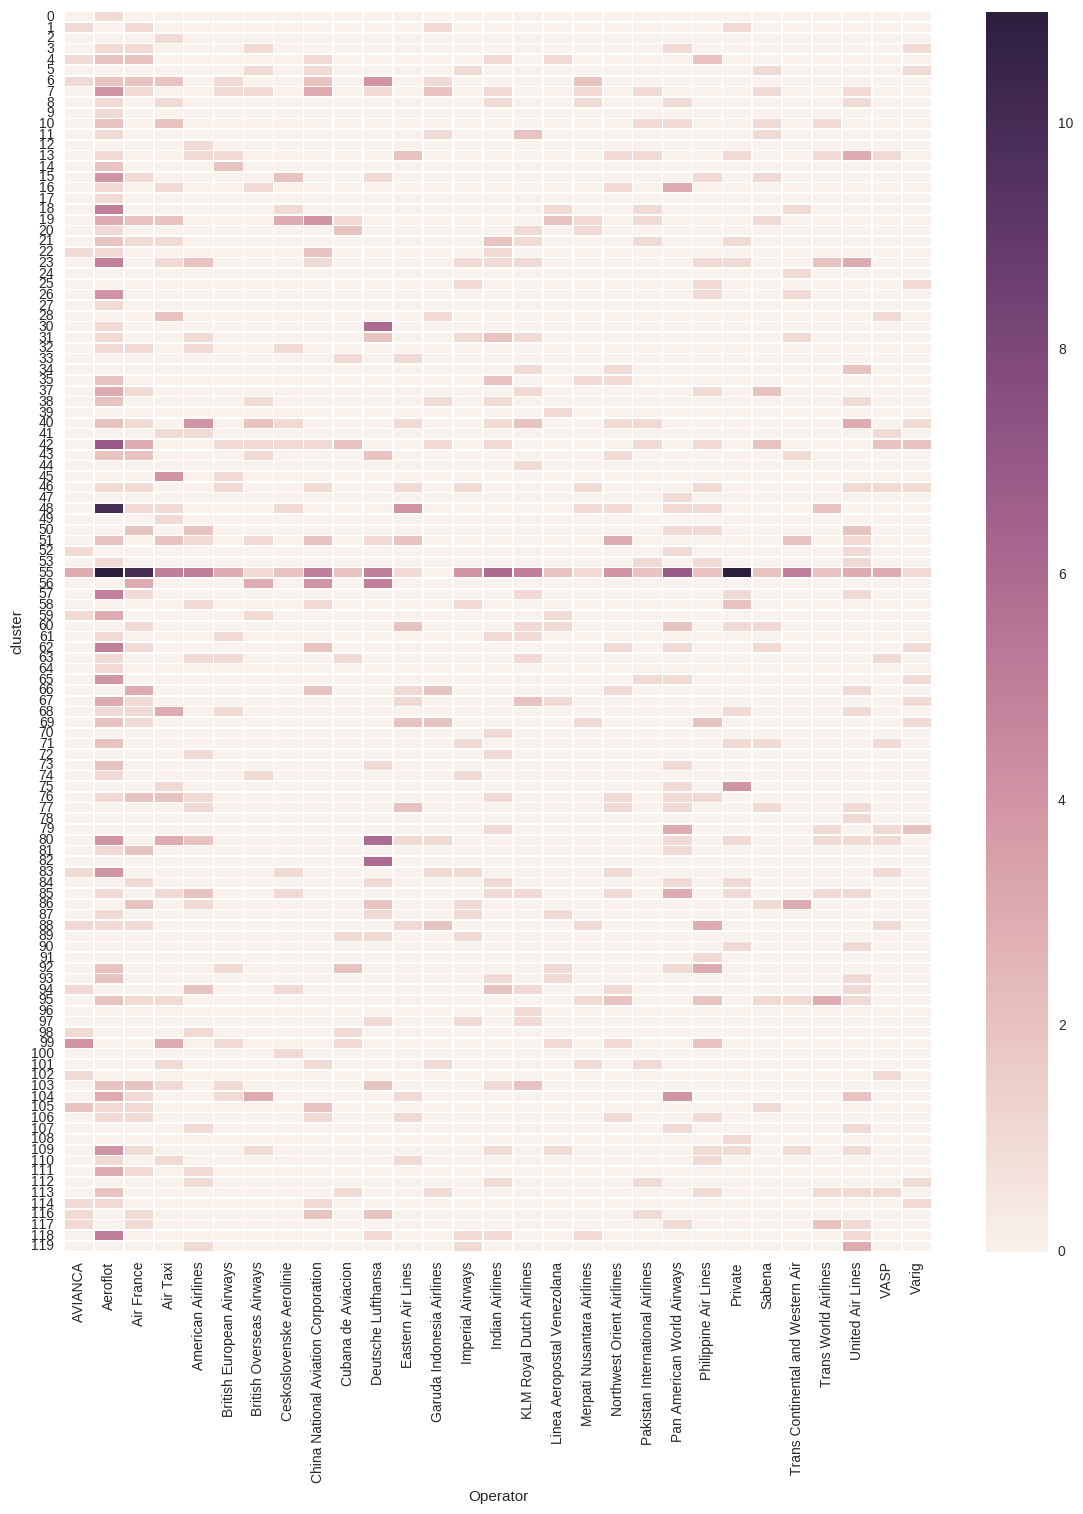

In [41]:
#df.pivot(index='date', columns='variable', values='value')
ap1 = apc[apc['Operator'].isin(TopOperators)].groupby(['Operator','cluster']).size().reset_index()
ap1.columns=['Operator','cluster','size']
ap1 = ap1.pivot(index='cluster', columns='Operator',values='size')
ap1.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(14,16))         # Sample figsize in inches
sns.heatmap(ap1, annot=False, linewidths=.5, ax=ax);

In [44]:
OPERATOR = 'Philippine Air Lines'
CLUSTER = 92
ap1 = apc[apc['Operator']==OPERATOR].sort_values(by='cluster').loc[apc['cluster']==CLUSTER,['Summary']]
pd.set_option('display.max_colwidth', 3000)
ap1

,Summary
2391,"The aircraft was on a flight from Cauayan, Isabela to Manila when it crashed into mountainous terrain after an explosion in the rear lavatory of the aircraft broke off the tail section."
2404,A hand grenade exploded inside the passenger cabin at FL130 . A safe emergency landing was made despite a 9 sq. ft. hole in the fuselage.
1005,"The plane was on a flight from Daet, Camarines to Manila when it crashed after experiencing a violent explosion in the tail of the aircraft. Two ex-convicts confessed to planting a time bomb aboard the flight in order to kill the husband of a woman involved with another man."
